# Generated by alkh

In [3]:
import sys
sys.path.insert(0, r'/mnt/hgfs/dev/open_source_projects/alkh/tests')
sys.path.insert(1, r'/snap/pycharm-professional/311/plugins/python/helpers/pydev')
sys.path.insert(2, r'/snap/pycharm-professional/311/plugins/python/helpers/third_party/thriftpy')
sys.path.insert(3, r'/snap/pycharm-professional/311/plugins/python/helpers/pydev')
sys.path.insert(4, r'/mnt/dev/open_source_projects/alkh')
sys.path.insert(5, r'/mnt/hgfs/dev/open_source_projects/alkh/tests')
sys.path.insert(6, r'/mnt/hgfs/dev/azure_projects/ATool/research/erez/../')
sys.path.insert(7, r'/snap/pycharm-professional/311/plugins/python/helpers/pycharm_display')
sys.path.insert(8, r'/home/erez/.cache/JetBrains/PyCharm2022.2/cythonExtensions')
sys.path.insert(9, r'/mnt/dev/open_source_projects/alkh/tests')
sys.path.insert(10, r'/home/erez/anaconda3/lib/python38.zip')
sys.path.insert(11, r'/home/erez/anaconda3/lib/python3.8')
sys.path.insert(12, r'/home/erez/anaconda3/lib/python3.8/lib-dynload')
sys.path.insert(13, r'/home/erez/.local/lib/python3.8/site-packages')
sys.path.insert(14, r'/home/erez/anaconda3/lib/python3.8/site-packages')
sys.path.insert(15, r'/snap/pycharm-professional/311/plugins/python/helpers/pycharm_matplotlib_backend')

In [4]:
import pandas as pd
import alkh

In [5]:
import networkx as nx
import numpy as np
from alkh.utils import code_range_utils
from alkh.logic_core import CallGraphManager
import itertools
import libcst as cst
from typing import *

In [6]:
stack_df = pd.read_pickle('e3cf792c0da9477a97d6eeea57bfdd9e.pkl')
stack_df[["file_path", "function", "lineno", "locals_names"]]

,file_path,function,lineno,locals_names
0,/mnt/dev/open_source_projects/alkh/alkh/logic_...,_calc_dependency_graph,301,"[self, assignment_df, target_id_to_line_number..."
1,/mnt/dev/open_source_projects/alkh/alkh/logic_...,__init__,16,"[self, file_path]"
2,/mnt/dev/open_source_projects/alkh/tests/logic...,<module>,6,"[file_path, line_number]"


In [7]:
alkh.print_context(stack_df.loc[0, 'context'])

/mnt/dev/open_source_projects/alkh/alkh/logic_core.py
298: 
299:         self._dependency_graph = di_graph
300:         pass
301: 
302:     @staticmethod


In [8]:
self = stack_df.loc[0, 'locals']['self']
assignment_df = stack_df.loc[0, 'locals']['assignment_df']
target_id_to_line_numbers_df = stack_df.loc[0, 'locals']['target_id_to_line_numbers_df']
di_graph = stack_df.loc[0, 'locals']['di_graph']
var_names = stack_df.loc[0, 'locals']['var_names']
name = stack_df.loc[0, 'locals']['name']
index = stack_df.loc[0, 'locals']['index']
row_series = stack_df.loc[0, 'locals']['row_series']
source = stack_df.loc[0, 'locals']['source']
target = stack_df.loc[0, 'locals']['target']

In [9]:
assignment_df

,targets,data,start_line,end_line,node_range,sources,scope_index,canonic_targets,canonic_sources,canonic_targets_ids
0,[[h]],"{'names': [], 'ints': ['1'], 'floats': []}",27,27,"CodeRange(start=CodePosition(line=27, column=4...",[],3,"[{'self': False, 'scope_index': 3, 'id': (3, '...",[],"[(3, h)]"
1,[[a]],"{'names': [], 'ints': ['2'], 'floats': []}",28,28,"CodeRange(start=CodePosition(line=28, column=4...",[],3,"[{'self': False, 'scope_index': 3, 'id': (3, '...",[],"[(3, a)]"
2,[[b]],"{'names': [['a']], 'ints': ['7'], 'floats': ['...",29,29,"CodeRange(start=CodePosition(line=29, column=4...",[[a]],3,"[{'self': False, 'scope_index': 3, 'id': (3, '...","[(3, a)]","[(3, b)]"
3,[[ll]],"{'names': [['a']], 'ints': [], 'floats': ['6.4']}",31,31,"CodeRange(start=CodePosition(line=31, column=8...",[[a]],8,"[{'self': False, 'scope_index': 8, 'id': (8, '...","[(3, a)]","[(8, ll)]"
4,[[k]],"{'names': [['ll'], ['t'], ['g']], 'ints': [], ...",35,35,"CodeRange(start=CodePosition(line=35, column=2...","[[ll], [t], [g]]",11,"[{'self': False, 'scope_index': 11, 'id': (11,...","[(8, ll)]","[(11, k)]"
5,[[ft]],"{'names': [['k1'], ['k1'], ['k']], 'ints': [],...",36,36,"CodeRange(start=CodePosition(line=36, column=2...","[[k1], [k1], [k]]",11,"[{'self': False, 'scope_index': 11, 'id': (11,...","[(11, k)]","[(11, ft)]"
6,[[mm]],"{'names': [], 'ints': ['0'], 'floats': []}",40,40,"CodeRange(start=CodePosition(line=40, column=1...",[],13,"[{'self': False, 'scope_index': 13, 'id': (13,...",[],"[(13, mm)]"
7,[[k]],"{'names': [], 'ints': ['0'], 'floats': []}",41,41,"CodeRange(start=CodePosition(line=41, column=1...",[],13,"[{'self': False, 'scope_index': 13, 'id': (13,...",[],"[(13, k)]"
8,[[k]],"{'names': [['mm']], 'ints': [], 'floats': []}",44,44,"CodeRange(start=CodePosition(line=44, column=2...",[[mm]],14,"[{'self': False, 'scope_index': 14, 'id': (14,...","[(13, mm)]","[(14, k)]"


In [10]:
self._scopes_df

,scope,start_line_number,end_line_number,header_end_line_number,length,name,node_range,scope_index
0,<libcst.metadata.scope_provider.GlobalScope ob...,1,45,1,45,global,None,0
1,<libcst.metadata.scope_provider.FunctionScope ...,11,15,11,5,a,"CodeRange(start=CodePosition(line=11, column=4...",1
2,<libcst.metadata.scope_provider.ClassScope obj...,5,23,5,19,A,"CodeRange(start=CodePosition(line=5, column=0)...",2
3,<libcst.metadata.scope_provider.FunctionScope ...,26,45,26,20,a_func,"CodeRange(start=CodePosition(line=26, column=0...",3
4,<libcst.metadata.scope_provider.FunctionScope ...,6,9,6,4,__init__,"CodeRange(start=CodePosition(line=6, column=4)...",4
5,<libcst.metadata.scope_provider.FunctionScope ...,17,19,17,3,b,"CodeRange(start=CodePosition(line=17, column=4...",5
6,<libcst.metadata.scope_provider.FunctionScope ...,21,23,22,3,c,"CodeRange(start=CodePosition(line=22, column=4...",6
7,<libcst.metadata.scope_provider.ComprehensionS...,36,36,36,1,None,"CodeRange(start=CodePosition(line=36, column=2...",7
8,NaN,30,45,30,16,NaN,"CodeRange(start=CodePosition(line=30, column=4...",8
9,NaN,32,45,32,14,NaN,"CodeRange(start=CodePosition(line=32, column=8...",9


In [12]:
scope_series = self._scopes_df.iloc[1]
scope_series

scope                     <libcst.metadata.scope_provider.FunctionScope ...
start_line_number                                                        11
end_line_number                                                          15
header_end_line_number                                                   11
length                                                                    5
name                                                                      a
node_range                CodeRange(start=CodePosition(line=11, column=4...
scope_index                                                               1
Name: 1, dtype: object

In [15]:
scope_range = scope_series["node_range"]
scope_index = scope_series["scope_index"]
scope_range, scope_index

(CodeRange(start=CodePosition(line=11, column=4), end=CodePosition(line=15, column=12)),
 1)

In [17]:
self._scopes_df["node_range"].dropna().apply(code_range_utils.check_code_range_a_contains_b, args=(scope_range,))

1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: node_range, dtype: bool

In [18]:
def does_scope_contain_assignment(scope_range, assignment_node_range):
    if scope_range is not None:
        result = code_range_utils.check_code_range_a_is_within_b(assignment_node_range, scope_range)
    else:
        result = True
    return result

In [22]:
does_contains_series = self._scopes_df["node_range"].apply(does_scope_contain_assignment, args=(scope_range,))
does_contains_series

0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: node_range, dtype: bool

In [27]:
containing_scope_indexes_list = self._scopes_df[does_contains_series]["scope_index"].tolist()
containing_scope_indexes_list

[0, 1, 2]

In [37]:
g = nx.DiGraph()

In [ ]:
for vertice in self._scopes_df["scope_index"]:
    g.add_node()

In [29]:
g.add_nodes_from(self._scopes_df["scope_index"])

In [30]:
g

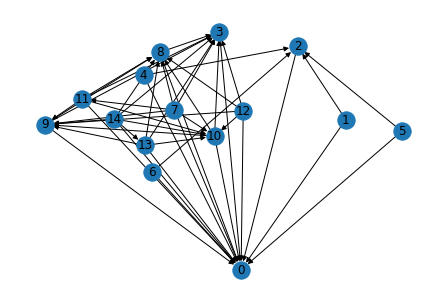

In [35]:
nx.draw(g, with_labels=True) 

In [40]:
g.add_nodes_from(self._scopes_df["scope_index"])
for index, scope_series in self._scopes_df.iterrows(): 
    scope_range = scope_series["node_range"]
    scope_index = scope_series["scope_index"]
    if scope_range is not None:
        does_contains_series = self._scopes_df["node_range"].apply(does_scope_contain_assignment, args=(scope_range,))
        containing_scope_indexes_list = self._scopes_df[does_contains_series]["scope_index"].tolist()
        for other_scope_index in containing_scope_indexes_list:
            g.add_edge(other_scope_index, scope_index)

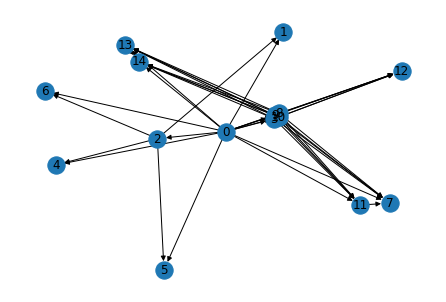

In [39]:
nx.draw(g, with_labels=True) 

In [49]:
file_path = 'play3.py'

In [50]:
file_lines = open(file_path, 'r').readlines()
file_content = open(file_path, 'r').read()
wrapper = cst.metadata.MetadataWrapper(cst.parse_module(file_content))
scopes = set(wrapper.resolve(cst.metadata.ScopeProvider).values())
ranges = wrapper.resolve(cst.metadata.PositionProvider)
file_number_of_lines = len(file_lines)

In [51]:
wrapper

MetadataWrapper(
    Module(
        body=[
            ClassDef(
                name=Name(
                    value='A',
                    lpar=[],
                    rpar=[],
                ),
                body=IndentedBlock(
                    body=[
                        FunctionDef(
                            name=Name(
                                value='__init__',
                                lpar=[],
                                rpar=[],
                            ),
                            params=Parameters(
                                params=[
                                    Param(
                                        name=Name(
                                            value='self',
                                            lpar=[],
                                            rpar=[],
                                        ),
                                        annotation=None,
                                        equal=Maybe